# Group 6

**Alba, Nikki**

**Campol, Russel**

**Ilagan, Zyreel**

In [12]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import random

# Load Dataset
file_path = 'healthcare-dataset-stroke-data.csv'
df = pd.read_csv(file_path)

# Data Preprocessing
for column in df.select_dtypes(include=[np.number]).columns:
    df[column].fillna(df[column].mean(), inplace=True)
for column in df.select_dtypes(include=[object]).columns:
    df[column].fillna(df[column].mode()[0], inplace=True)

# Convert categorical columns to numeric
df = pd.get_dummies(df, drop_first=True)

# Separate features and target
X = df.drop("stroke", axis=1)
y = df["stroke"]

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Data Split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Define the Isolation Tree class
class IsolationTree:
    def __init__(self, max_depth):
        # int - Maximum depth of the tree
        self.max_depth = max_depth
        self.tree = None

# Parameters:   x (numpy.ndarray): Input data point, 
#               current_depth (int): Current depth of the tree

    def fit(self, X, current_depth=0):
        # Returns - Tree structure representing the isolation tree.
        
        if current_depth >= self.max_depth or len(X) <= 1:
            return None

        # Randomly select a feature
        feature_idx = random.randint(0, X.shape[1] - 1)
        feature_values = X[:, feature_idx]

        # Randomly select a split value
        split_value = random.uniform(np.min(feature_values), np.max(feature_values))

        # Split the data
        left_split = X[X[:, feature_idx] < split_value]
        right_split = X[X[:, feature_idx] >= split_value]

        left_tree = self.fit(left_split, current_depth + 1)
        right_tree = self.fit(right_split, current_depth + 1)

        self.tree = (feature_idx, split_value, left_tree, right_tree)
        return self.tree

    def path_length(self, x, current_depth=0):
        # Returns Path length of the data point in the isolation tree.
        if self.tree is None:
            return current_depth

        feature_idx, split_value, left_tree, right_tree = self.tree
        if x[feature_idx] < split_value:
            if left_tree is None:
                return current_depth + 1
            return self.path_length_from_tree(left_tree, x, current_depth + 1)
        else:
            if right_tree is None:
                return current_depth + 1
            return self.path_length_from_tree(right_tree, x, current_depth + 1)

    def path_length_from_tree(self, tree, x, current_depth):
        # tree: tuple
        # Returns: Path length of the data point in the isolation tree.
        if tree is None:
            return current_depth

        feature_idx, split_value, left_tree, right_tree = tree
        if x[feature_idx] < split_value:
            if left_tree is None:
                return current_depth + 1
            return self.path_length_from_tree(left_tree, x, current_depth + 1)
        else:
            if right_tree is None:
                return current_depth + 1
            return self.path_length_from_tree(right_tree, x, current_depth + 1)

# Define the Isolation Forest class

# Parameters:   n_trees (int): Number of isolation trees in the forest.
#               sample_size (int): Number of samples to use for each tree.
class IsolationForestCustom:
    def __init__(self, n_trees=100, sample_size=256):
        self.n_trees = n_trees
        self.sample_size = sample_size
        self.forest = []

    def fit(self, X):
        self.forest = []
        max_depth = int(np.log2(self.sample_size))
        for _ in range(self.n_trees):
            sample_indices = np.random.choice(X.shape[0], self.sample_size, replace=False)
            sample = X[sample_indices]
            tree = IsolationTree(max_depth)
            tree.fit(sample)
            self.forest.append(tree)

    def path_length(self, x):
        # Calculate the average path length for a data point across all trees in the forest.
        # Retunrs Average path length of the data point across all trees
        return np.mean([tree.path_length(x) for tree in self.forest])

    def anomaly_score(self, X):
        # Calculate anomaly scores for each data point in X using the isolation forest.
        # Returns List of anomaly scores for each data point
        scores = []
        for x in X:
            avg_path_length = self.path_length(x)
            score = 2 ** (-avg_path_length / c(self.sample_size))
            scores.append(score)
        return scores

def c(n):
    return 2 * (np.log(n - 1) + 0.5772156649) - 2 * (n - 1) / n
# n - Sample size
# Returns Average path length correction factor.

# Training
iso_forest_custom = IsolationForestCustom(n_trees=100, sample_size=256)
iso_forest_custom.fit(X_train)

# Results are in the bottom


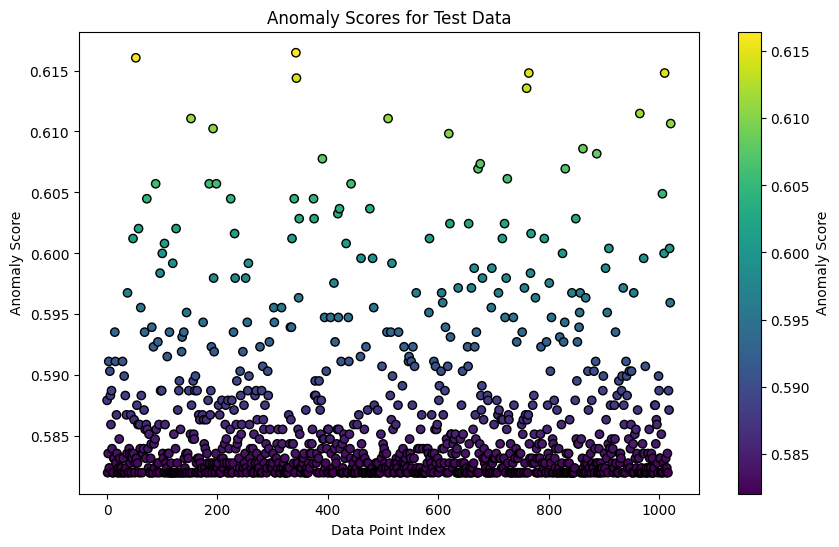

In [13]:
import matplotlib.pyplot as plt

# anomaly scores
anomaly_scores = iso_forest_custom.anomaly_score(X_test)

# ScatterPlot
plt.figure(figsize=(10, 6))
plt.scatter(range(len(anomaly_scores)), anomaly_scores, c=anomaly_scores, cmap='viridis', edgecolors='k')
plt.colorbar(label='Anomaly Score')
plt.title('Anomaly Scores for Test Data')
plt.xlabel('Data Point Index')
plt.ylabel('Anomaly Score')
plt.show()


IsolationTree(max_depth):
    if current_depth >= max_depth or len(X) <= 1:
        return {"size": len(X)}

    feature_idx = randomly select feature index
    split_value = randomly select split value within feature range
    partition data into left and right based on split_value

    left_tree = recursively build left tree
    right_tree = recursively build right tree

    return { "feature_idx": feature_idx, "split_value": split_value, "left": left_tree, "right": right_tree }

IsolationForest(n_trees, sample_size, max_depth):
    for each tree in n_trees:
        sample_indices = randomly select sample_size indices
        sample = X[sample_indices]
        build IsolationTree with max_depth on sample
        store tree in forest

    anomaly_score(X):
        for each data point in X:
            avg_path_length = calculate average path length across all trees
            score = calculate anomaly score based on avg_path_length
        return anomaly scores


# Isolation Forest 
**Final forecast:**
- Anomaly scores are computed based on the average path length from the root to the data points across all trees.
- Shorter path lengths indicate anomalies.

**Overall Logic:**

- Relies on the idea that anomalies are few and different, making them easier to isolate.
- No bootstrapping; each tree is constructed with a randomly sampled subset of the data.


# Random Forests:
**Final forecast:**
- For classification: majority vote from all trees.
- For regression: average of predictions from all trees.

**Overall Logic:**

- Combines the predictions of multiple decision trees to enhance generalization.
- Utilizes ensemble learning to improve stability and accuracy.


In [14]:
# Get the anomaly scores
scores = iso_forest_custom.anomaly_score(X_test)
print(scores)

[0.5879459498504855, 0.5820091835628013, 0.5835864346885462, 0.5911369474705281, 0.5824030962545877, 0.5903375780968985, 0.5883438806362383, 0.5859603294347885, 0.5887420807476159, 0.5839814148879495, 0.5820091835628013, 0.5820091835628013, 0.5831917216369561, 0.5831917216369561, 0.5935415559578021, 0.5911369474705281, 0.5827972755524916, 0.5867537716259872, 0.5835864346885462, 0.5820091835628013, 0.5820091835628013, 0.5824030962545877, 0.5847721774535569, 0.5831917216369561, 0.5820091835628013, 0.5824030962545877, 0.5824030962545877, 0.5820091835628013, 0.5911369474705281, 0.5831917216369561, 0.5820091835628013, 0.5899382988589509, 0.5820091835628013, 0.5883438806362383, 0.5824030962545877, 0.5867537716259872, 0.5835864346885462, 0.5967629229779158, 0.5820091835628013, 0.5820091835628013, 0.5839814148879495, 0.5835864346885462, 0.5827972755524916, 0.5867537716259872, 0.5820091835628013, 0.5835864346885462, 0.5831917216369561, 0.601220869318279, 0.5835864346885462, 0.586356916322361, 0